In [ ]:
# Импортируем необходимые инструменты
import pandas as pd
import numpy as np

from scipy import stats as st
from scipy.stats import chi2_contingency

import seaborn as sns
from IPython.display import Image, display
import matplotlib.pyplot as plt

Задание 1

Менеджер сайта, предоставляющего независимым продавцам площадку для
продаж, решил провести АБ-тест, выбрав в качестве метрики время обработки
заказов продавцами. Для контрольной группы продавцов оставили предыдущий
интерфейс работы с заказами, а для тестовой группы внедрили интерактивный
дэшборд заказов.
Полученные результаты времени обработки заказов в часах для тестовой и
контрольной групп представлены в csv-файлах time_order_processing_test.csv и
time_order_processing_control.csv.
Проверьте гипотезу менеджера о том, что использование интерактивного
дэшборда уменьшило время обработки заказов.

In [ ]:
# Загружаем CSV-даныне
control = pd.read_csv(r'C:\Downloads\time_order_processing_control.csv')
test = pd.read_csv(r'C:\Downloads\time_order_processing_test.csv')

In [ ]:
# Проводим первичный обзор данных
# 1. Просмотр датафрейма, вывод нескольких первых строк.
#control.head(5)
test.head(5)

,Unnamed: 0,time
0,0,16.56
1,1,23.76
2,2,12.12
3,3,13.80
4,4,15.08


In [ ]:
# 2. Вывод некоторых статистических сведений
#control.describe()
test.describe()

,Unnamed: 0,time
count,1393.000000,1393.000000
mean,696.000000,18.009160
std,402.268774,5.857845
min,0.000000,8.000000
25%,348.000000,13.840000
50%,696.000000,17.480000
75%,1044.000000,21.520000
max,1392.000000,44.520000


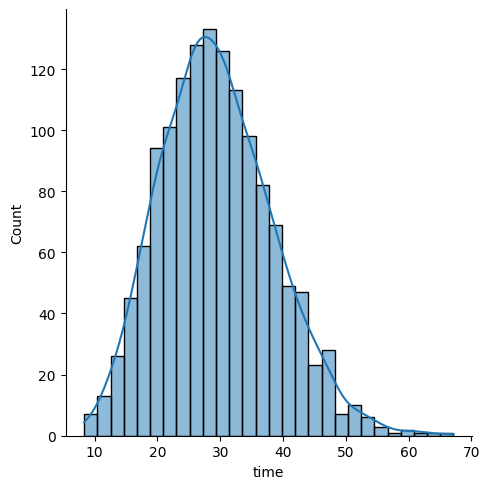

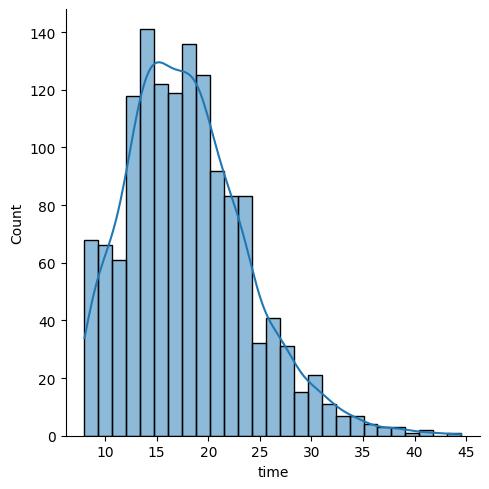

In [ ]:
# 3. Визуално оцениваем плотность распределения данных (гистограмма + KDE/ЯОП)
# Kernel Density Estimation, KDE или ядерная оценка плотности - один из непараметрических способов оценки плотности
# случайной величины, особенностью которого является сглаживание данных.
g_c = sns.displot(control, x="time", kde=True)
g_t = sns.displot(test, x="time", kde=True)

In [ ]:
# Сравним стандартные отклонений выборок, для определения необходимости применением теста Уэлча.
control_std = control['time'].std( )
print(f'Стандартное отклонение контрольной выборки: {control_std:.4f}')
test_std = test['time'].std( )
print(f'Стандартное отклонение тестовой выборки: {test_std:.4f}')

Стандартное отклонение контрольной выборки: 8.9799
Стандартное отклонение тестовой выборки: 5.8578


In [ ]:
# Разница между стандартными отклонениями двух выборок, очевидно и ожидаемо, не существенна (equal_var=True).
# Применим двухвыборочный Т-тест для независимых выборок.
# index = 1 for control, index = 2 for test
# Нулевая гипотеза H_0: mu_1 = mu_2, т.е.использование альтренативного дэшборда не оказало никакого влияния на время обработки заказов продавцом.
# Альтернативная гипотеза H_1: mu_1 > mu_2, т.е. использование изменений в интерфейсе площадки агрегатора уменьшило время обработки заказов.
# Уровень значимости альфа определим равным α = 0.05

In [ ]:
# T-тест для сравнения среднего значения (независимые выборки)
t_statistic, p_value = st.ttest_ind(control['time'], test['time'], equal_var=True, alternative = "greater")

print("Результаты t-теста:")
print(f"t-статистика: {t_statistic:.5f}")
print(f"p-значение: {p_value}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("\nОтвергаем нулевую гипотезу. Использование интерактивного дэшборда значимо уменьшило время обработки заказов.")
else:
    print("\nНе отвергаем нулевую гипотезу. Разница в среднем времени обработки заказов имеет случайный характер и статистически не значима. Положительное влиянение изменений в интерфейсе не доказано")

Результаты t-теста:
t-статистика: 40.01056
p-значение: 2.9949647128013707e-277

Отвергаем нулевую гипотезу. Использование интерактивного дэшборда значимо уменьшило время обработки заказов.


Задание 4 (дополнительное)

Постройте 90%-е доверительные интервалы по выборкам из задания 1 для
среднего времени обработки заказа продавцами, использующими и не
использующими интерактивный дашборд.

In [ ]:
# Зададим доверительный уровень, в соответствии с условиями задачи
confidence_level = 0.9
alpha = 0.1

In [ ]:
# Расчёт доверительного интервала производится по формуле:
# среднее значение +/- критическое значение * стандартное отклонение / квадратный корень из размера выборки

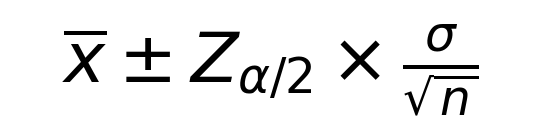

In [ ]:
# Отрисовка формулы доверительного интервала
formula = '$\\overline{x} \\pm Z_{\\alpha/2}\\times \\frac{\\sigma}{\\sqrt{n}}$'

### Создание области отрисовки
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_axis_off()

### Отрисовка формулы
t = ax.text(0.5, 0.5, formula,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=50, color='black')

### Определение размеров формулы
ax.figure.canvas.draw()
bbox = t.get_window_extent()

# Установка размеров области отрисовки
fig.set_size_inches(bbox.width/80,bbox.height/80) # dpi=80

plt.savefig('formula.svg')


In [ ]:
# Средние и стандартные отклонения для двух выборок
mean_control_group = control['time'].mean()
std_control_group = control['time'].std()

mean_test_group = test['time'].mean()
std_test_group = test['time'].std()

# Размер выборок
n_control_group = len(control)
n_test_group = len(test)

# Определение критического значения Z_а/2 для 90% уровня доверия
z_control_group = 1.65
z_test_group = 1.65

In [ ]:
# Z-таблица критических значений
display(Image(url='https://www.codecamp.ru/content/images/2020/09/za2.png', width = 800))


In [ ]:
# Полная формула доверительного интервала с указанием стандартных критических значений Z

display(Image(url='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*JqwbognQCkmCsPN7UgmEDQ.jpeg', width = 800))

In [ ]:
# Расчёт доверительных интервалов выборок
confidence_interval_low_control = mean_control_group - z_control_group * (std_control_group / np.sqrt(n_control_group))
confidence_interval_high_control = mean_control_group + z_control_group * (std_control_group / np.sqrt(n_control_group))

confidence_interval_low_test_group = mean_test_group - z_test_group * (std_test_group / np.sqrt(n_test_group))
confidence_interva_high_test_group = mean_test_group + z_test_group * (std_test_group / np.sqrt(n_test_group))

print("Доверительный интервал для среднего времени обработки заказа без использования интерактивного дашборда:")
print(f"({confidence_interval_low_control:.3f}, {confidence_interval_high_control:.3f})")
print("Доверительный интервал для среднего времени обработки заказа с использованием интерактивного дашборда:")
print(f"({confidence_interval_low_test_group:.3f}, {confidence_interva_high_test_group:.3f})")

Доверительный интервал для среднего времени обработки заказа без использования интерактивного дашборда:
(29.106, 29.900)
Доверительный интервал для среднего времени обработки заказа с использованием интерактивного дашборда:
(17.750, 18.268)


In [ ]:
# Инструменты статистики scipy позволяют произвести подобный расчет в одну формулу, которая принимаем в себя три значения:
# - доверительный уровень (90% в нашем случае)
# - среднее значение выборки (Mean)
# - стандартную ошибку среднего (Standard Error of Mean - SEM)
# Размер выборок контрольной и тетсовой групп достаточно велик, поэтому, согласно ЦПТ, построим доверительный интервал с использованем нормального распределения.

interval_con = st.norm.interval(confidence=0.9, loc=np.mean(control['time']), scale=st.sem(control['time']))
interval_test = st.norm.interval(confidence=0.9, loc=np.mean(test['time']), scale=st.sem(test['time']))
print(f'Для контрольной выборки 90% доверительный интервал составляет: ({(interval_con[0]):.4f} , {(interval_con[1]):.4f})')
print(f'Для тестовой выборки 90% доверительный интервал составляет: ({(interval_test[0]):.4f} , {(interval_test[1]):.4f})')
print('То есть, в 90 процентах случаев наш доверительный интервал будет включать истинное среднее значение времени обработки заказа.')

Для контрольной выборки 90% доверительный интервал составляет: (29.1071 , 29.8986)
Для тестовой выборки 90% доверительный интервал составляет: (17.7510 , 18.2673)
То есть, в 90 процентах случаев наш доверительный интервал будет включать истинное среднее значение времени обработки заказа.


Задание 2

Этот же маркетплейс предоставил с 1 мая часто заказывающим клиентам
бесплатную доставку, действующую для всех заказов до конца календарного
месяца, если в этом месяце клиент уже сделал пять заказов (то есть начиная с
шестого заказа).
В файле clients_orders.csv представлена информация о количестве заказов,
которое тысяча случайно отобранных часто заказывающих клиентов сделали в
апреле и мае.
Проверьте гипотезу о том, что клиенты стали делать больше заказов после
введения бесплатной доставки с шестого заказа.

In [ ]:
# Импорт данных
orders = pd.read_csv(r'C:\Downloads\clients_orders.csv')

In [ ]:
# Проводим первичный обзор данных
# 1. Просмотр датафрейма, вывод нескольких первых строк.
orders.head(10)

,Unnamed: 0,orders_april,orders_may
0,0,1,13
1,1,5,7
2,2,10,8
3,3,11,6
4,4,1,10
5,5,5,8
6,6,2,11
7,7,9,6
8,8,3,8
9,9,3,7


In [ ]:
# 2. Вывод некоторых статистических сведений
orders.describe()

,Unnamed: 0,orders_april,orders_may
count,1000.000000,1000.000000,1000.000000
mean,499.500000,5.762000,7.982000
std,288.819436,3.006392,2.414437
min,0.000000,0.000000,2.000000
25%,249.750000,3.000000,6.000000
50%,499.500000,6.000000,8.000000
75%,749.250000,8.000000,10.000000
max,999.000000,14.000000,14.000000


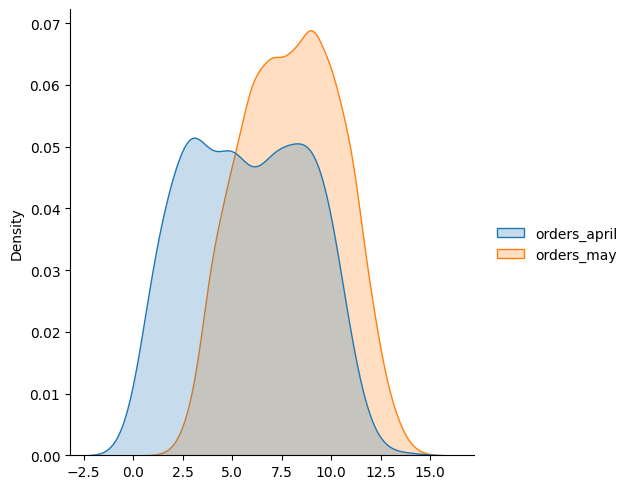

In [ ]:
# 3. Визуално оцениваем плотность распределения данных (гистограмма + KDE/ЯОП)
orders_test = orders[['orders_april','orders_may']]
sns.displot(data=orders_test, kind="kde", fill=True)

In [ ]:
# Применим двухвыборочный Т-тест для зависимых выборок.
# index = 1 for april, index = 2 for may
# Нулевая гипотеза H_0: mu_1 = mu_2, или mu_d = 0, т.е. введение бесплатной доставки с 6-ого заказа не повлияло на число заказов за текущий месяц.
# Альтернативная гипотеза H_1: mu_1 < mu_2, т.е. введение нового бонуса увеличило число заказов за месяц.
# уровень значимости альфа = 0.05

In [ ]:
# T-тест для сравнения среднего значения (зависимые выборки)
t_statistic_rel, p_value_rel = st.ttest_rel(orders['orders_may'], orders['orders_april'], alternative = "greater")

print("Результаты t-теста:")
print(f"t-статистика: {t_statistic_rel:.5f}")
print(f"p-значение: {p_value_rel}")

# Интерпретация результатов
alpha = 0.05
if p_value_rel < alpha:
    print("\nОтвергаем нулевую гипотезу. Клиенты стали делать больше заказов полсе введения акции на бесплатную доставку.")
else:
    print("\nНе отвергаем нулевую гипотезу. Введение бонуса на бесплатную доставку с 6-ого заказа не повлияло на число оформленных заказов пользователями за месяц.")

Результаты t-теста:
t-статистика: 18.17200
p-значение: 2.8066025158955254e-64

Отвергаем нулевую гипотезу. Клиенты стали делать больше заказов полсе введения акции на бесплатную доставку.


Задание 3

В файле vendors.csv представлена анонимизированная информация о
продавцах маркетплейса: тип продукции ( goods ) и время осуществления
продаж через этот маркетплейс ( experience ).

Переменная goods принимает значения:

clothes — одежда

electronics — электроника и техника

outdoor — товары для активного отдыха

beauty — косметика и товары для ухода

pets — товары для животных

Переменная experience принимает значения:

0-1 — до одного года продаж

1-3 — от одного до трёх лет продаж

3-5 — от трёх до пяти лет продаж

5- — от пяти лет продаж
стаж продаж на маркетплейсе не зависит от типа
реализуемой продукции
Проверьте гипотезу о том, что .

In [ ]:
# Импорт данных
vendors = pd.read_csv(r'C:\Downloads\vendors.csv')

In [ ]:
# Обзор датафрейма
vendors.head(10)

,Unnamed: 0,goods,experience
0,0,beauty,5-
1,1,beauty,3-5
2,2,outdoor,0-1
3,3,outdoor,0-1
4,4,clothes,3-5
5,5,clothes,1-3
6,6,clothes,1-3
7,7,clothes,5-
8,8,clothes,1-3
9,9,clothes,5-


In [ ]:
# Построение таблицы сопряженности
table = pd.crosstab(vendors['goods'], vendors['experience'])
table

experience,0-1,1-3,3-5,5-
goods,,,,
beauty,40,65,22,26
clothes,104,129,42,46
electronics,68,67,29,31
outdoor,36,46,23,26
pets,13,17,4,5


In [ ]:
# Нулевая гипотеза H_0: Cтаж продаж на маркетплейсе не зависит от типа реализуемой продукции.
# Альтернативная гипотеза H_1: Cтаж продаж на маркетплейсе зависит от типа реализуемой продукции.
# Уровень значимости альфа = 0.05 (5 %)

In [ ]:
res = chi2_contingency(table)

print(f'хи-квадрат стастистика: {res.statistic:.5f}')
print(f'p-value: {res.pvalue:.5f}')
print('степеней свободы:', res.dof)
print('рассчитанные ожидаемые значения:\n', res.expected_freq)

# Интерпретация результатов
# Проверка гипотезы путем сравнения Хи-квадрат статисткиик с критическим значением χ2(5%)_12.
chi2_05 = 21.026
if res.statistic > chi2_05:
    print("\nОтвергаем нулевую гипотезу. Существует статистически значимая зависимость стажа продаж от типа реализуемой ЧЯКАВС продукции.")
else:
    print("\nНе отвергаем нулевую гипотезу. Нет достаточных (значимых) оснований полагать, что стаж продаж на маркетплейсе зависит от типа реализуемой продукции.")



хи-квадрат стастистика: 9.17797
p-value: 0.68766
степеней свободы: 12
рассчитанные ожидаемые значения:
 [[ 47.59594756  59.08462455  21.88319428  24.43623361]
 [ 99.85816448 123.96185936  45.91179976  51.2681764 ]
 [ 60.66150179  75.30393325  27.89034565  31.14421931]
 [ 40.75208582  50.58879619  18.73659118  20.92252682]
 [ 12.13230036  15.06078665   5.57806913   6.22884386]]

Не отвергаем нулевую гипотезу. Нет достаточных (значимых) оснований полагать, что стаж продаж на маркетплейсе зависит от типа реализуемой продукции.


In [ ]:
# Критические значения распределения Хи-квадрат
display(Image(url='https://www.scribbr.com/wp-content/uploads/2022/05/chi-square-distribution-table.png', width = 800))

In [ ]:
# Проверка гипотез путем сравнения значения p-value с уровнем значимости α
if res.pvalue < alpha:
   print("\nОтвергаем нулевую гипотезу. Существует статистически значимая зависимость стажа продаж от типа реализуемой ЧЯКАВС продукции.")
else:
    print("\nНе отвергаем нулевую гипотезу. Нет достаточных (значимых) оснований полагать, что стаж продаж на маркетплейсе зависит от типа реализуемой продукции.")


Не отвергаем нулевую гипотезу. Нет достаточных (значимых) оснований полагать, что стаж продаж на маркетплейсе зависит от типа реализуемой продукции.


<Axes: xlabel='goods'>

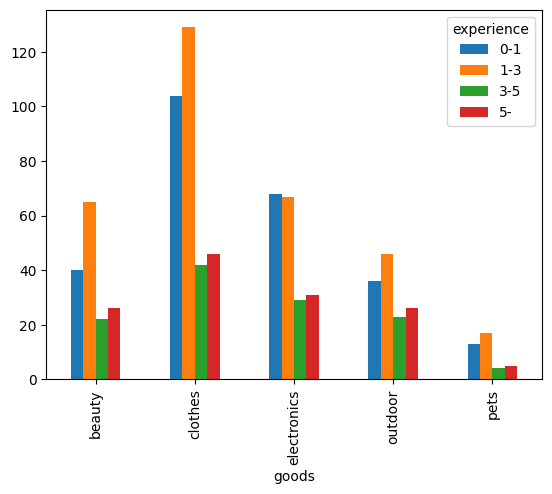

In [ ]:
# Построение столбчатой диаграммы
table.plot(kind='bar')